# Análisis en tiempo discreto 


![Sistema Balancin](./img/balancin.png)

Modelo  en tiempo discreto, basado en ecuaciones en diferencias, de un sistema multirrotor de un grado de libertad tipo balancı́n a lazo cerrado. 

Este modelo permite simular diferentes condiciones para el sistema balancín y aproximarnos a una idea de la implementación del control para este sistema en un microprocesador. 

## Modelo en tiempo discreto 

* La velocidad y la aceleración angular, descritas en el modelo cinemático y dinámico del balancín del TP2: (todas funciones de $t$)  

$$ \begin{align}
\dot{\theta} &= \omega \\
\dot{\omega} &= \frac{1}{J} \tau  
\end{align}
$$

* Donde $J$ es el momento de inercia. Teniendo en cuenta la definición de la derivada de cálculo diferencial: 

$$
\begin{equation}
    \lim_{\Delta t \to 0} \frac{ f(t + \Delta t)  -f(t) } { \Delta t  } = \dot{f}(t) 
    \label{ec: defincion derivada }
\end{equation}$$
 
* Podemos, entonces, aproximar la derivada, mediante la elección de un $\Delta t$ no infinitesimal pero relativamente pequeño, y las ecuaciones de movimiento se pueden reescribir: 


$$
\begin{align}
    \lim_{\Delta t \to 0} \frac{ \theta (t + \Delta t)  -\theta (t) } { \Delta t  } \approx \omega (t) \\ 
    \lim_{\Delta t \to 0} \frac{ \omega (t + \Delta t)  -\omega (t) } { \Delta t  } \approx \frac{1}{J} \tau (t)   
 \end{align}$$
 
 
 * Si ahora muestreamos las funciones en tiempo contínuo a intervalos de tiempo regulares $\Delta t$ obtendremos la secuencia de valores discretos 
 
 $$
 \theta _k = \theta ( \Delta t \cdot k ) \ \ ; \ \ 
 \omega _k = \omega ( \Delta t \cdot k ) \\ 
 k = \{ 0,1,2,3...N \}$$

* Un desplazamiento de un intervalo de tiempo $\Delta t$ de las funciones en tiempo contínuo, es un desplazamiento hacia el siguiente elemento de la secuencia de valores discretizados de esa función. De esta forma, la expresión de la derivada, en tiempo discreto: 

$$
 \frac{ \theta _{k+1}  -\theta _k } { \Delta t  } = \omega _k \\    
 \frac{ \omega _{k+1}  -\omega _k } { \Delta t  } = \frac{1}{J} \tau _k
$$

$$
 \theta _{k+1}    = \theta _k  + \omega _k \Delta t   \\    
 \omega _{k+1}    = \omega _k + \frac{1}{J} \tau _k
$$


Siendo $\Delta t $ el intervalo de discretización. La expresión ya no es una aproximación ya que ... 

* A partir de estas ecuaciones, se puede conocer la evuloción del sistema dinámico en forma discreta. Y se pueden expresar de forma matricial 

$ 
\begin{bmatrix}
 \theta _{k+1} \\
  \omega _{k+1}  
\end{bmatrix} = \begin{bmatrix}
                1 & \Delta t \\
                0 & 1 
                \end{bmatrix} \begin{bmatrix}
                             \theta _{k} \\
                              \omega _{k} 
                            \end{bmatrix}  + \begin{bmatrix}
                                                0 \\
                                                \frac{\Delta t}{J}
                                              \end{bmatrix} \begin{bmatrix}
                                                                 \tau _k
                                                            \end{bmatrix}$


**Tanto las expresiones del modelo como la implementanción en Octave son provistos por la cátedra.** 

## Implementación del modelo

* Definimos las características del modelo y parámetros de simulación: 

In [166]:
J = 0.1;          %1/10 
T = 10;           % Tiempo de simulación 
dt = 0.1;         % Intervalo de muestreo 
N = T/dt;         % Cantidad de estados discretos (muestras)
ts = 0:dt:T-dt;   % Tiempo discreto 

% Matrices del sistema de estados discretizado.
A = [1, dt; 0, 1];
B = [0; dt/J];

% Vector de estados e inicialización.
% q_1 = theta; q_2 = theta_punto
q = zeros(2, N);

% Vector de acciones de control.
u = zeros(1, N);

* Definimos también una función para calcular los estados 

In [167]:
function qk = calcular_estados(A,B,u,q,N)
    qk = zeros(2, N);
    qk= q;
    for i = 1 : (N-1)
        qk(:, i+1) = A*qk(:, i) + B*u(:, i);
       end
endfunction


* Y una función para plotear los estados del modelo y la acción de control 

In [168]:
function figure= graficar(q,u,ts)
    figure;  
    subplot(3, 1, 1);
    plot(ts, q(1, :), 'LineWidth',5, 'color','r'); 
    grid on; ; xlabel('t [s]'); ylabel('q1 (\theta)');
    subplot(3, 1, 2,'replace'); plot(ts, q(2, :), 'LineWidth',5, 'color','m'); 
    grid on; xlabel('t [s]'); ylabel('q2 (\omega)');
    subplot(3, 1, 3); plot(ts, u(1, :), 'LineWidth',5, 'color','b'); 
    grid on;xlabel('t [s]'); ylabel('u');
    print (1, "figure1.pdf")
endfunction

## Prueba del modelo de simulación

1) Se prueba el funcinamiento básico del sistema, sin ninguna acción de control sobre el mismo. 

* El sistema en su posición inicial se matiene en la misma, se encuentra perfectamente balanceado 


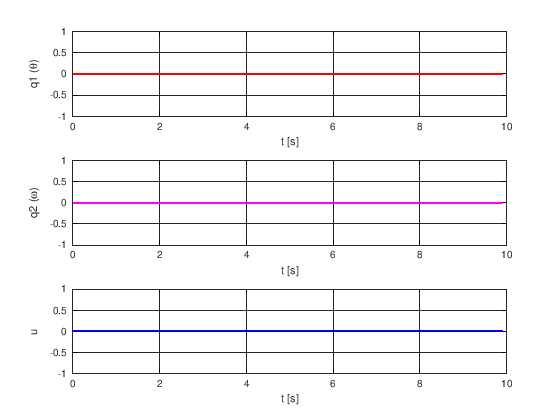

In [169]:
% Vector de estado inicial.
q = zeros(2, N);
q0 = [0;0];
q(:, 1) = q0;
qk = calcular_estados(A,B,u,q,N); 
graficar(qk,u,ts);

* Si se iguala la condición inicial de velocidad ($q_2$) a un valor constante distinto de cero, el ángulo $\theta$ crecerá con forma de rampa ( ya que es la integral de la velocidad) 

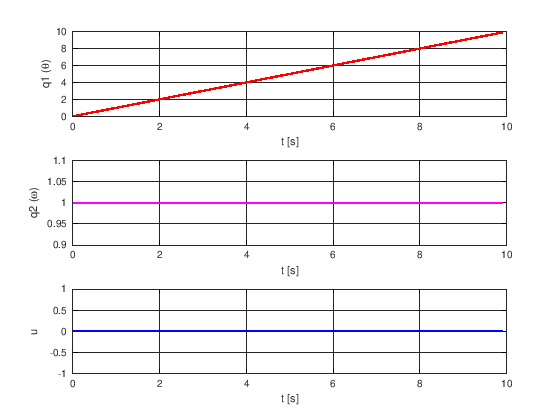

In [170]:
q = zeros(2, N);
q0 = [0; 1];
q(:, 1) = q0;
q = calcular_estados(A,B,u,q,N);
graficar(q,u,ts);

* Si se elige una inclinación arbitraria constante deberá permencer inclinado ( en este modelo no se contempla la fuerza de gravedad) 

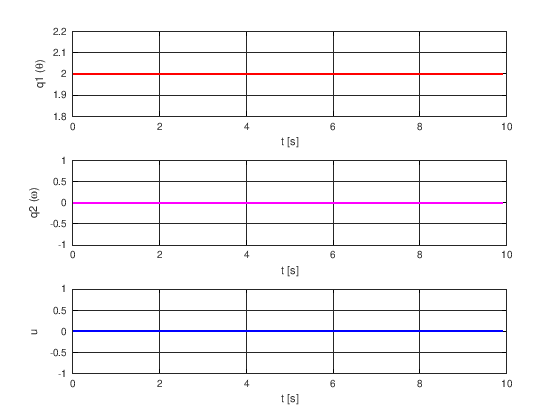

In [171]:
q = zeros(2, N);
q0 = [2; 0];
q(:, 1) = q0;
q = calcular_estados(A,B,u,q,N);
graficar(q,u,ts);

* Mediante la aplicación de una fuerza de forma de impulso, por ser la variable de estado de velocidad la integral del torque aplicado, $\omega$ será un escalón, y la posición $\theta$ será una rampa. 

Esto coincide con el modelo físico puesto a que no consideramos fricción alguna, y ante la aplicación de un torque en el sistema este girará indefinidamente 

(REVISAR ESTO) 

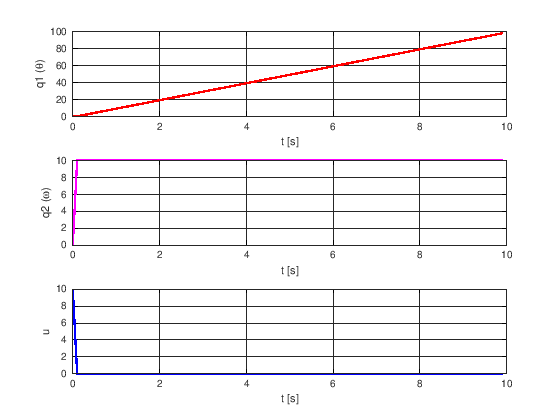

In [172]:
q = zeros(2, N);
q0 = [0; 0];
q(:, 1) = q0;
u = zeros(1, N);
u(1:1) = 10;
q = calcular_estados(A,B,u,q,N);
graficar(q,u,ts);

* si se excita al sistema con un escalón, sucede, en la velocidad angular $\omega$ algo similar a lo anterior en el ángulo $\theta$. 

Como el torque aplicado es un escalón, $\omega$ por ser su integral será una rampa, y a su vez $\theta$ por ser la integral de la velocidad angular $\omega$ será una exponencial 

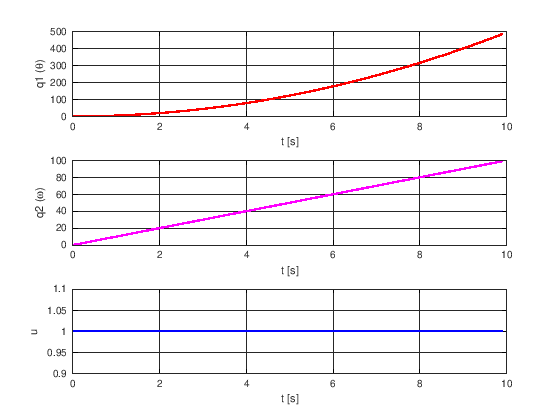

In [173]:
q = zeros(2, N);
q0 = [0; 0];
q(:, 1) = q0;
%u = zeros(1, N);
u = ones(1, N);
q = calcular_estados(A,B,u,q,N);

graficar(q,u,ts);

 Como se puede observar, para el caso en donde ambas condiciones iniciales son nulas el sistema se encuentra estable en la posición inicial $q_1 = 0$. Aunque, también para el caso de condición inicial de posición $q_1 = 2$ el sistema se encuentra en equilibrio. 
 
 Entonces, el sistema se encontrará en **equilibrio** en todos los puntos que posea condición inicial de **velocidad** nula y la **acción de control** también sea nula, para que no exista aceleración. Esto se corresponde con las ecuaciones dinámicas del modelo, y la definición de punto/s de equilibrio: puntos que hacen las derivadas de las variables de estado nulas.  

### Cierre del lazo 

IMAGEN del lazo cerrado 


Ahora realimentamos la salida qi y la comparamos con un valor de $\theta$ deseado a la entrada. Ese valor de error es ahora nuestra entrada al sistema $u$, que será amplificado por un valor K y luego pasará por la función de planta G. 



1) Creamos una función que calcule los estados teniendo en cuesta esta realimentación

In [174]:
function qk = calcular_estados_fb(A,B,Titad,kp,q,N)
    qk = zeros(2, N);
    qk= q;
  for i = 1 : (N-1)
        qk(:, i+1) = A*qk(:, i) + B*kp*(Titad(:,i) - qk(1,i));
    end

endfunction


2) Creamos el vector fila con los valores de referecia de la posición deseada $\theta _d$ que se comparará con la salida y definimos la ganancia del controlador proporcional. 

* Kp = 1 

In [175]:
kp = 1; 
Titad = ones(1, N);

3) Lanzamos la simulación 

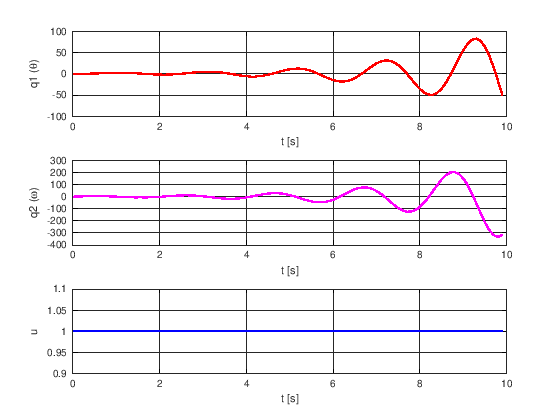

In [176]:
q = zeros(2, N);
q0 = [0; 0];
q(:, 1) = q0;
q = calcular_estados_fb(A,B,Titad,kp,q,N);

graficar(q,Titad,ts);

Como se puede observar parece que el sistema se vuelte totalmente inestable. Sin embargo, se debe tener en cuenta un aspecto importante, el **tiempo de integración** 

Con este tipo de resolución de la ecuación diferncial del modelo dinámico,  por integración con una constante de **tiempo de integración** (muestreo) , este parámetro es crucial para poder obtener la respuesta deseada. Si este tiempo no es lo suficientemente pequeño, podremos incluso tener una salida que no sea representativa del sistema. 

En este caso particular, al tener el bloque K, que amplifica el error, también a medida que se aumente K tendremos que ir disminuyendo el intervalo de tiempo dt. 

4) Ahora volvemos a simular pero con un tiempo de integración dt 10 veces menor. 


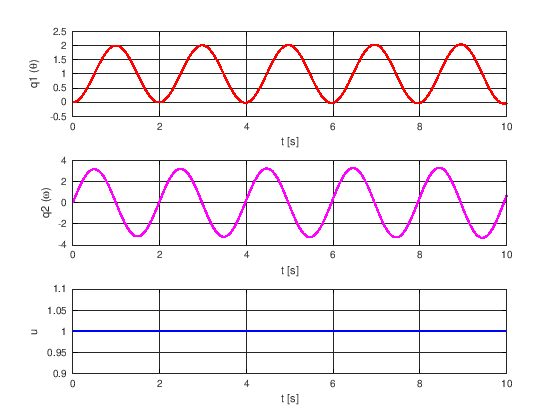

In [179]:
dt = 0.001;         % Intervalo de muestreo 
N = T/dt;         % Cantidad de estados discretos (muestras)
ts = 0:dt:T-dt;   % Tiempo discreto

%Ajustamos la longitud de los vectores 
A = [1, dt; 0, 1];
B = [0; dt/J];
Titad = ones(1, N);
q = zeros(2, N);
q0 = [0; 0];
q(:, 1) = q0;
q = calcular_estados_fb(A,B,Titad,kp,q,N);

graficar(q,Titad,ts);


La salida de este modelo de simulación ahora **sí corresponde** con el modelo descripto en el trabajo práctico Nº2, por lo que es un paso más para poder seguir el camino hacia afirmar que el modelo simulado se corresponde con el real. El parámetro del tiempo de integráción, entonces, debe adecuarse a cada valor de K para que a la salida obtengamos la respuesta esperada 

* Kp = 0.1 

La frecuencia cambia de la misma forma que se observó en el modelo del práctico anterior mencionado 


kp =  0.10000


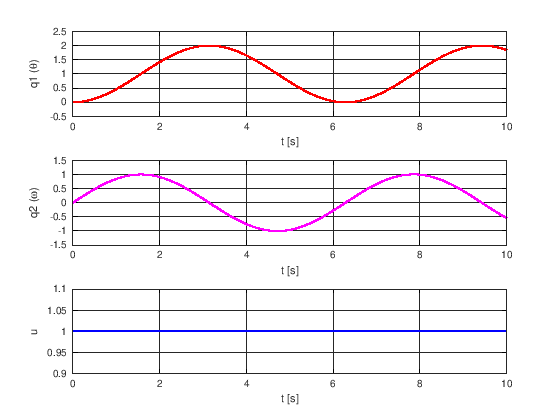

In [185]:
dt = 0.001;         % Intervalo de muestreo 
N = T/dt;         % Cantidad de estados discretos (muestras)
ts = 0:dt:T-dt;   % Tiempo discreto
kp = 0.1
%Ajustamos la longitud de los vectores 
A = [1, dt; 0, 1];
B = [0; dt/J];
Titad = ones(1, N);
q = zeros(2, N);
q0 = [0; 0];
q(:, 1) = q0;
q = calcular_estados_fb(A,B,Titad,kp,q,N);

graficar(q,Titad,ts);

* Kp = 10; 

kp =  10


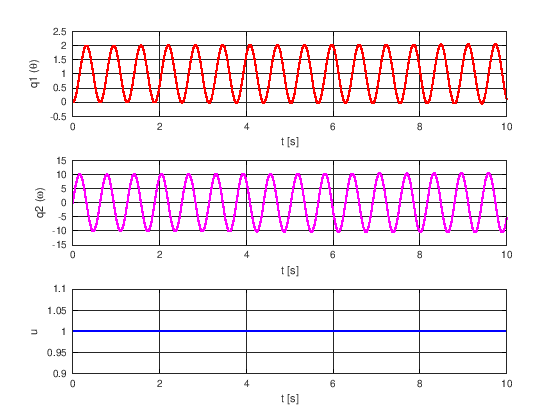

In [187]:
dt = 0.0001;         % Intervalo de muestreo 
N = T/dt;         % Cantidad de estados discretos (muestras)
ts = 0:dt:T-dt;   % Tiempo discreto
kp = 10
%Ajustamos la longitud de los vectores 
A = [1, dt; 0, 1];
B = [0; dt/J];
Titad = ones(1, N);
q = zeros(2, N);
q0 = [0; 0];
q(:, 1) = q0;
q = calcular_estados_fb(A,B,Titad,kp,q,N);

graficar(q,Titad,ts);

### Adición del bloque de controlador PD 

IMAGEN DEL SISETMA CON EL BLOQUE PD 


Ahora, al error amplificado kp veces, se le debe sumar la derivada de este multiplicado por Kd, correspondiente al controlador derivativo, y de esta forma obtenemos un controlador proporcional derivativo PD. 

Esta constante se puede calcular: 

$$ K_d = K_p T_d $$ ->OGATA 

La deriva se resuelve de igual forma que la derivada de las variables de estado, con ecuaciones en diferencia: 


